# Fire Detection in Urban and Wildland Areas Using CNNs

## Team Group 6

- **Ravindranath Katta**
- **Manoj Kumar Katakam**
- **Yashwanth Bharadwaj Nandamuru**

## Introduction

Fire represents a critical threat to both human lives and property in urban and wildland settings. The accurate and timely identification of fires is crucial for initiating rapid response efforts, which can significantly mitigate the impact of fires. Traditionally, the reliance on human intervention for fire detection, through manual methods or devices, has been substantial.

The integration of machine learning, particularly through the use of Convolutional Neural Networks (CNNs), revolutionizes the potential for fire detection. CNNs are adept at processing complex image data from various sources such as satellites, drones, and surveillance cameras, thereby enabling faster, more accurate, and automated detection capabilities. These advancements foster the development of sophisticated early warning systems and improve emergency response strategies.

## Dataset Overview

The dataset comprises 1900 images, categorized into 'nofire', 'small fire', and 'large fire'. These images have been meticulously labeled to reflect the presence and scale of fire, providing a balanced set for training our CNN.


### Import necessary libararies 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf

### Data Loading and Initial Processing

This section describes the process of loading the images into a DataFrame, inspecting the data structure, and preparing it for the subsequent analysis.

In [2]:
# Create an empty DataFrame
df = pd.DataFrame(columns=['path', 'label'])

# Helper function to add images to the DataFrame
def add_images_to_df(directory, label):
    # Check if the directory exists
    if not os.path.exists(directory):
        print(f"Directory '{directory}' does not exist.")
        return
    
    # Loop over files in the directory and add them to the DataFrame
    for dirname, _, filenames in os.walk(directory):
        for filename in filenames:
            df.loc[len(df)] = [os.path.join(dirname, filename), label]
    print(f"Added images from '{label}' directory.")

# Adding images from each directory
add_images_to_df("C:/Users/ravik/Downloads/fire/Nofire", "nofire")
add_images_to_df("C:/Users/ravik/Downloads/fire/small", "small")
add_images_to_df("C:/Users/ravik/Downloads/fire/large", "large")

# Shuffle the dataset to redistribute the labels
df = df.sample(frac=1).reset_index(drop=True)

# Display the first 10 rows of the shuffled DataFrame
print(df.tail(10))

Added images from 'nofire' directory.
Added images from 'small' directory.
Added images from 'large' directory.
                                                   path   label
9533  C:/Users/ravik/Downloads/fire/Nofire\nofire_05...  nofire
9534  C:/Users/ravik/Downloads/fire/small\middle_-55...   small
9535  C:/Users/ravik/Downloads/fire/small\middle_-21...   small
9536  C:/Users/ravik/Downloads/fire/Nofire\other_-65...  nofire
9537  C:/Users/ravik/Downloads/fire/small\middle_-28...   small
9538  C:/Users/ravik/Downloads/fire/small\middle_-45...   small
9539  C:/Users/ravik/Downloads/fire/large\large_-167...   large
9540  C:/Users/ravik/Downloads/fire/large\large_-229...   large
9541  C:/Users/ravik/Downloads/fire/small\middle_-19...   small
9542  C:/Users/ravik/Downloads/fire/small\middle_-16...   small


## Data Visualization

Visualize the dataset to gain insights into the distribution and nature of the fire and no-fire images.

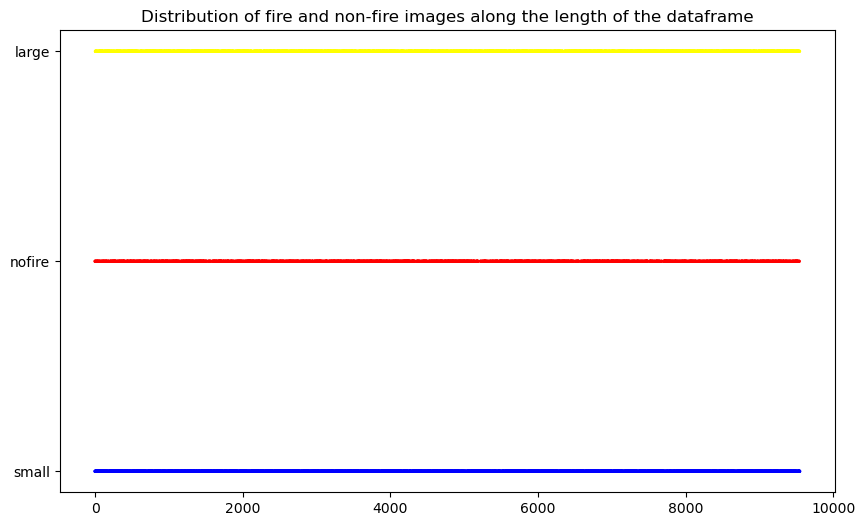

In [3]:
import matplotlib.pyplot as plt

# Mapping labels to specific colors
label_colors = df['label'].map({'nofire': 'red', 'small': 'blue', 'large': 'yellow'})

x = df.index
y = df['label']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=label_colors, s=2)  # 'c' directly assigns colors

# Add a title
plt.title("Distribution of fire and non-fire images along the length of the dataframe")

# Show the plot
plt.show()

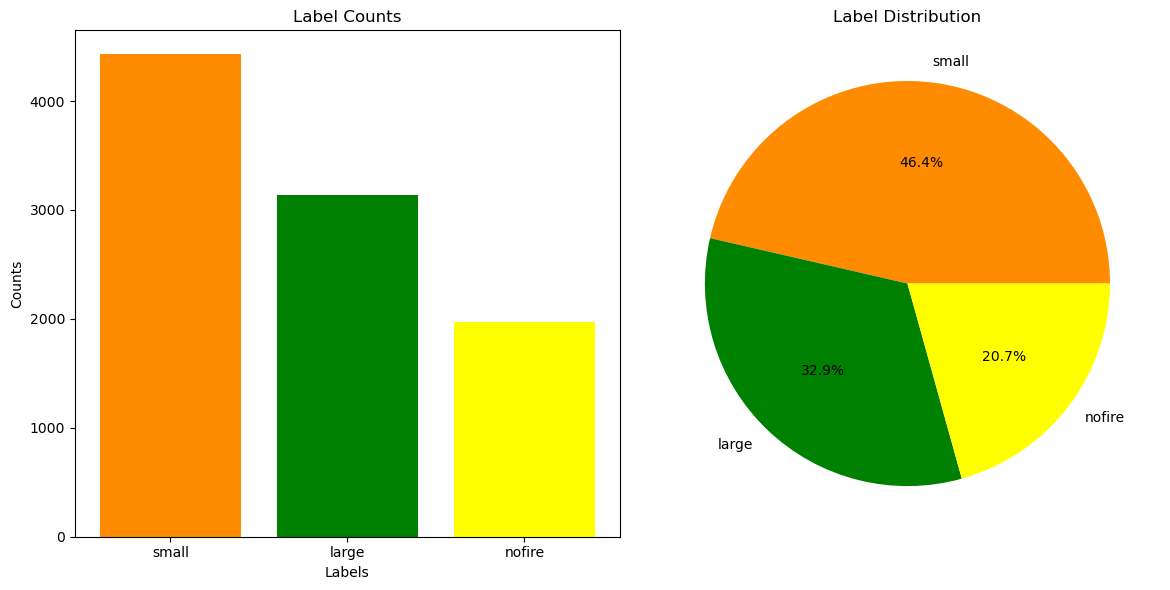

In [4]:
# Assuming df is a pandas DataFrame with a 'label' column
label_counts = df['label'].value_counts()
labels = label_counts.index
counts = label_counts.to_numpy()

# Create a 1x2 subplot layout
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart
ax1.bar(labels, counts, color=['darkorange', 'green','yellow'])
ax1.set_title("Label Counts")
ax1.set_xlabel("Labels")
ax1.set_ylabel("Counts")

# Pie chart
ax2.pie(counts, labels=labels, colors=['darkorange', 'green','yellow'], autopct='%1.1f%%')
ax2.set_title("Label Distribution")

# Show the plots
plt.tight_layout()
plt.show()

## Visualization of 'Small Fire' Images

In this section, we display a selection of images classified under the 'small fire' category. These visualizations are crucial for verifying the accuracy of our image labeling and to understand the characteristics of small-scale fires as captured by our dataset. The images are sampled randomly from the 'small fire' class and are displayed below to provide insights into the variety and common features of small fires.

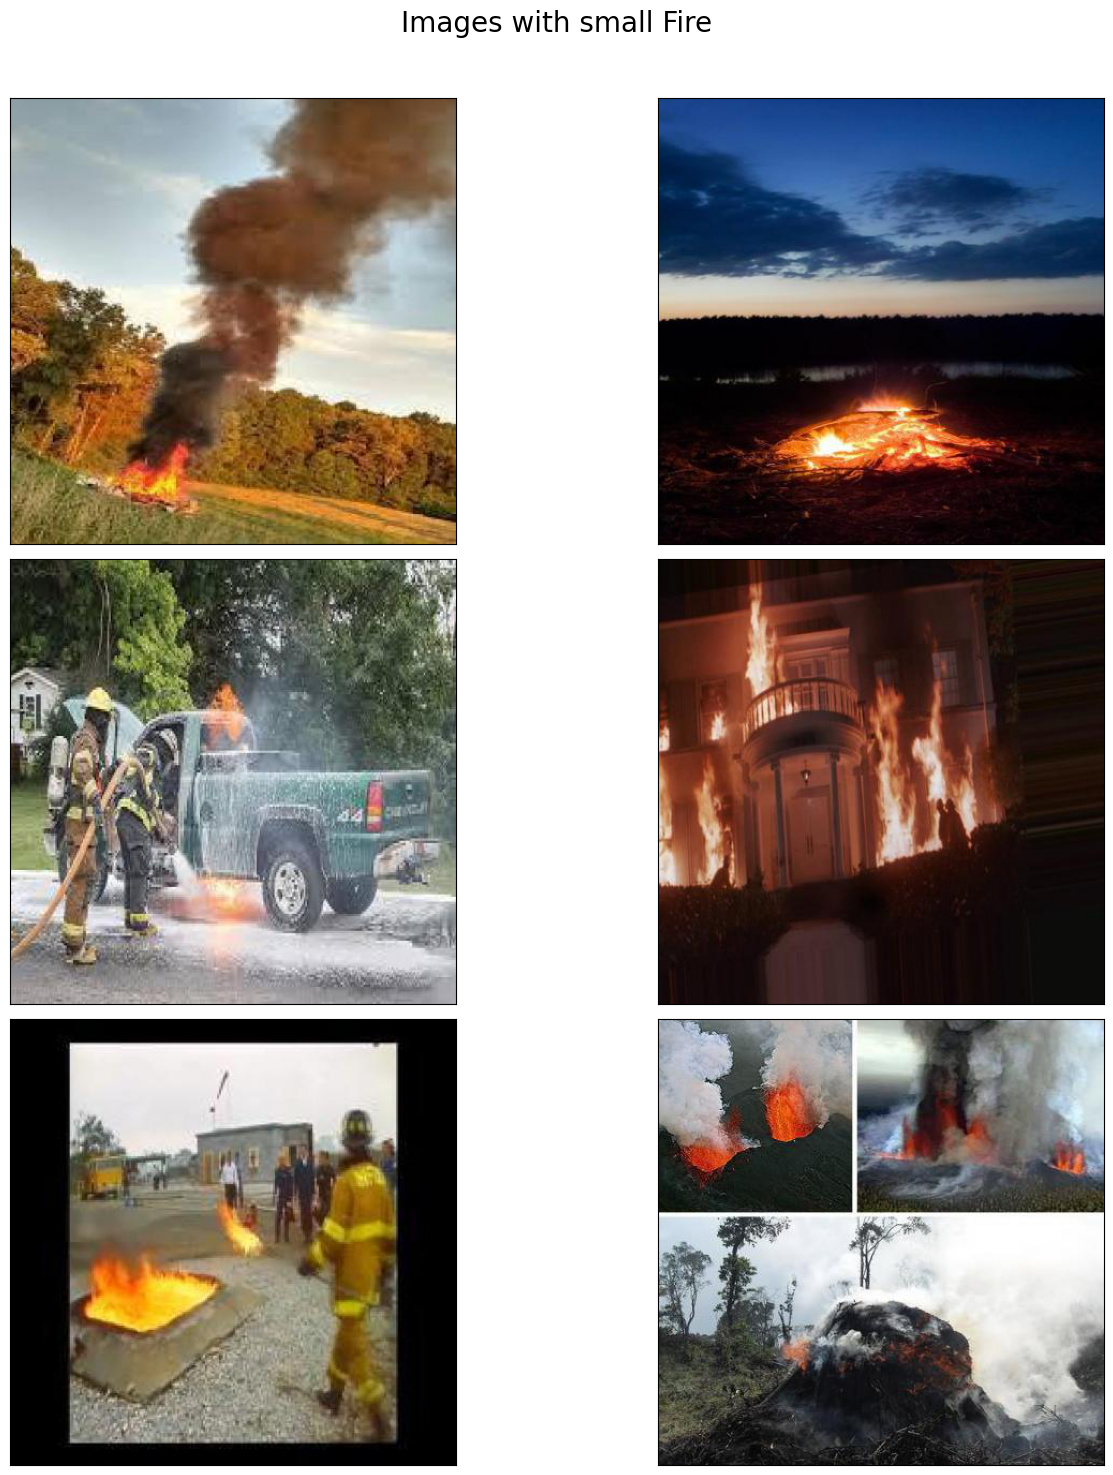

In [5]:
from tensorflow.keras.preprocessing import image


# Example data setup
# Assuming df is a pandas DataFrame with columns 'label' and 'path', where 'path' contains image paths.
label = 'small'  # Label for images with fire
data = df[df['label'] == label]

# Number of images to display
pics = 6

# Setting up the subplot grid
fig, ax = plt.subplots(int(pics // 2), 2, figsize=(15, 15))
plt.suptitle('Images with small Fire', fontsize=20)

# Flatten axes for easier iteration
ax = ax.ravel()

# Displaying images in the subplots
for i in range((pics // 2) * 2):
    # Sample a path from the dataset
    path = data.sample(1).loc[:, 'path'].to_numpy()[0]
    
    # Load and process the image
    img = image.load_img(path)
    img = image.img_to_array(img) / 255

    # Display the image
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Visualization of 'Large Fire' Images

This section presents a series of images identified as 'large fire' from our dataset. Displaying these images allows us to examine the distinguishing features of large-scale fires, which typically show extensive flame coverage and intense burning. These visualizations help in assessing the model's ability to recognize and classify more severe fire conditions accurately. The images are selected randomly to showcase the diversity within the 'large fire' category.

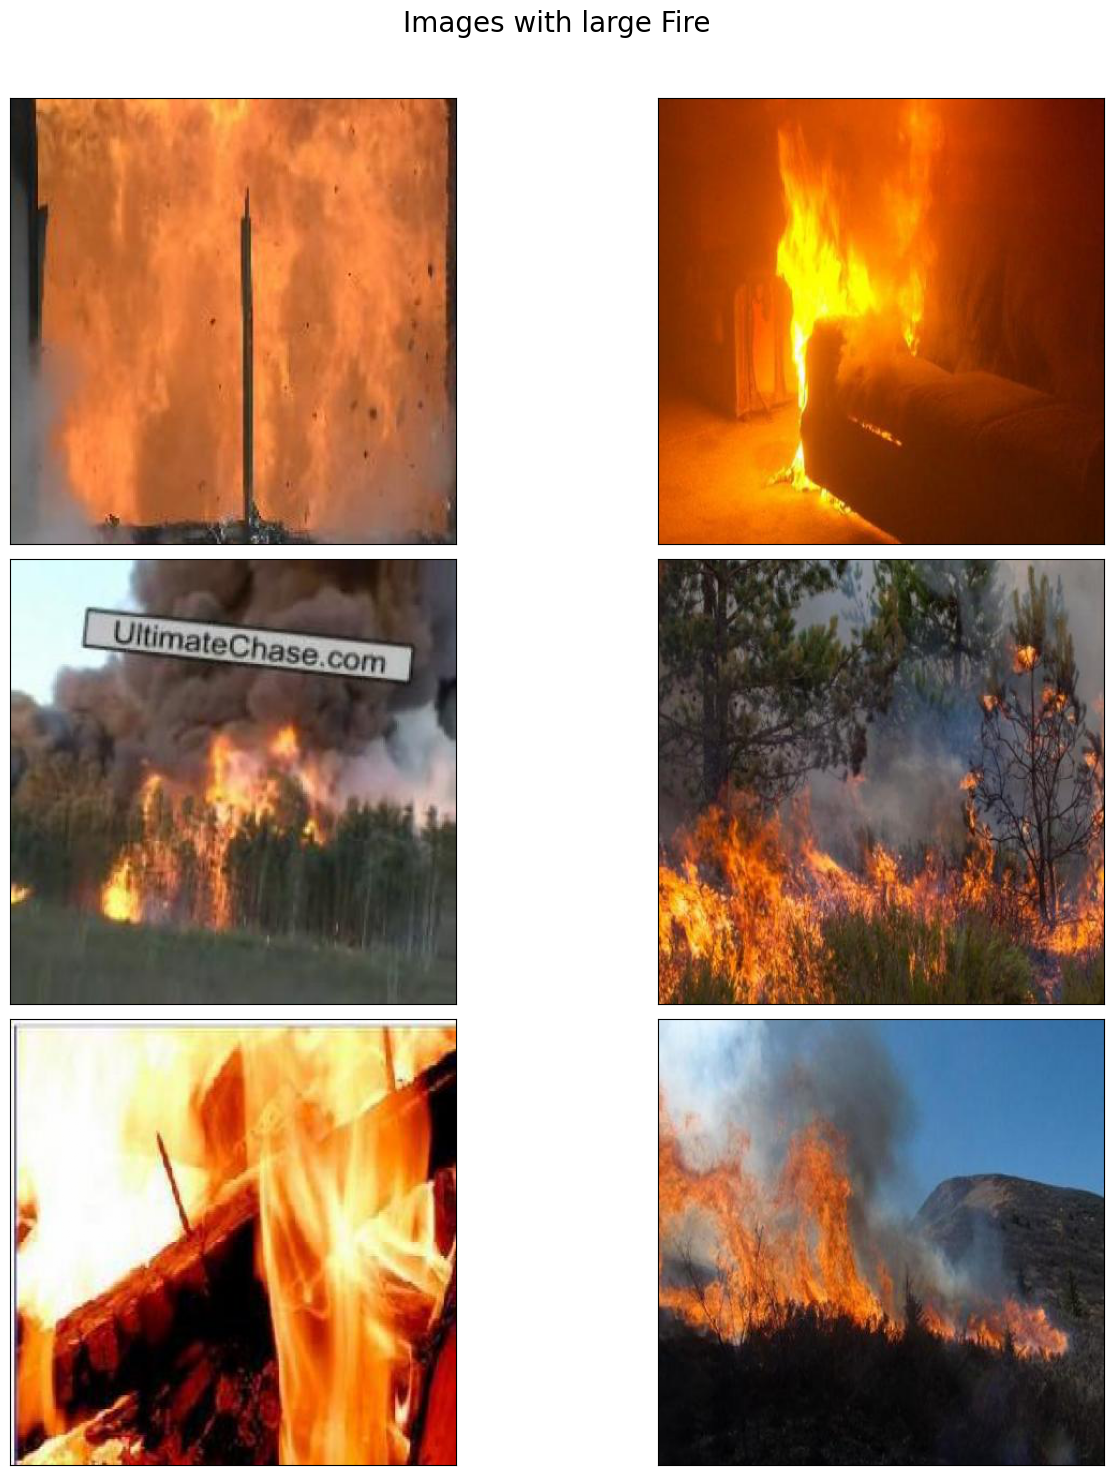

In [6]:
from tensorflow.keras.preprocessing import image


# Example data setup
# Assuming df is a pandas DataFrame with columns 'label' and 'path', where 'path' contains image paths.
label = 'large'  # Label for images with fire
data = df[df['label'] == label]

# Number of images to display
pics = 6

# Setting up the subplot grid
fig, ax = plt.subplots(int(pics // 2), 2, figsize=(15, 15))
plt.suptitle('Images with large Fire', fontsize=20)

# Flatten axes for easier iteration
ax = ax.ravel()

# Displaying images in the subplots
for i in range((pics // 2) * 2):
    # Sample a path from the dataset
    path = data.sample(1).loc[:, 'path'].to_numpy()[0]
    
    # Load and process the image
    img = image.load_img(path)
    img = image.img_to_array(img) / 255

    # Display the image
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Visualization of 'No Fire' Images

This section is dedicated to displaying images from our dataset that are classified as 'no fire'. These images are essential for understanding the baseline or control conditions within the scope of our study. They help in confirming the model's accuracy in identifying scenarios where there is no fire, which is crucial for minimizing false positives. The displayed images are randomly selected to illustrate the typical environments and scenes captured without any fire activity.

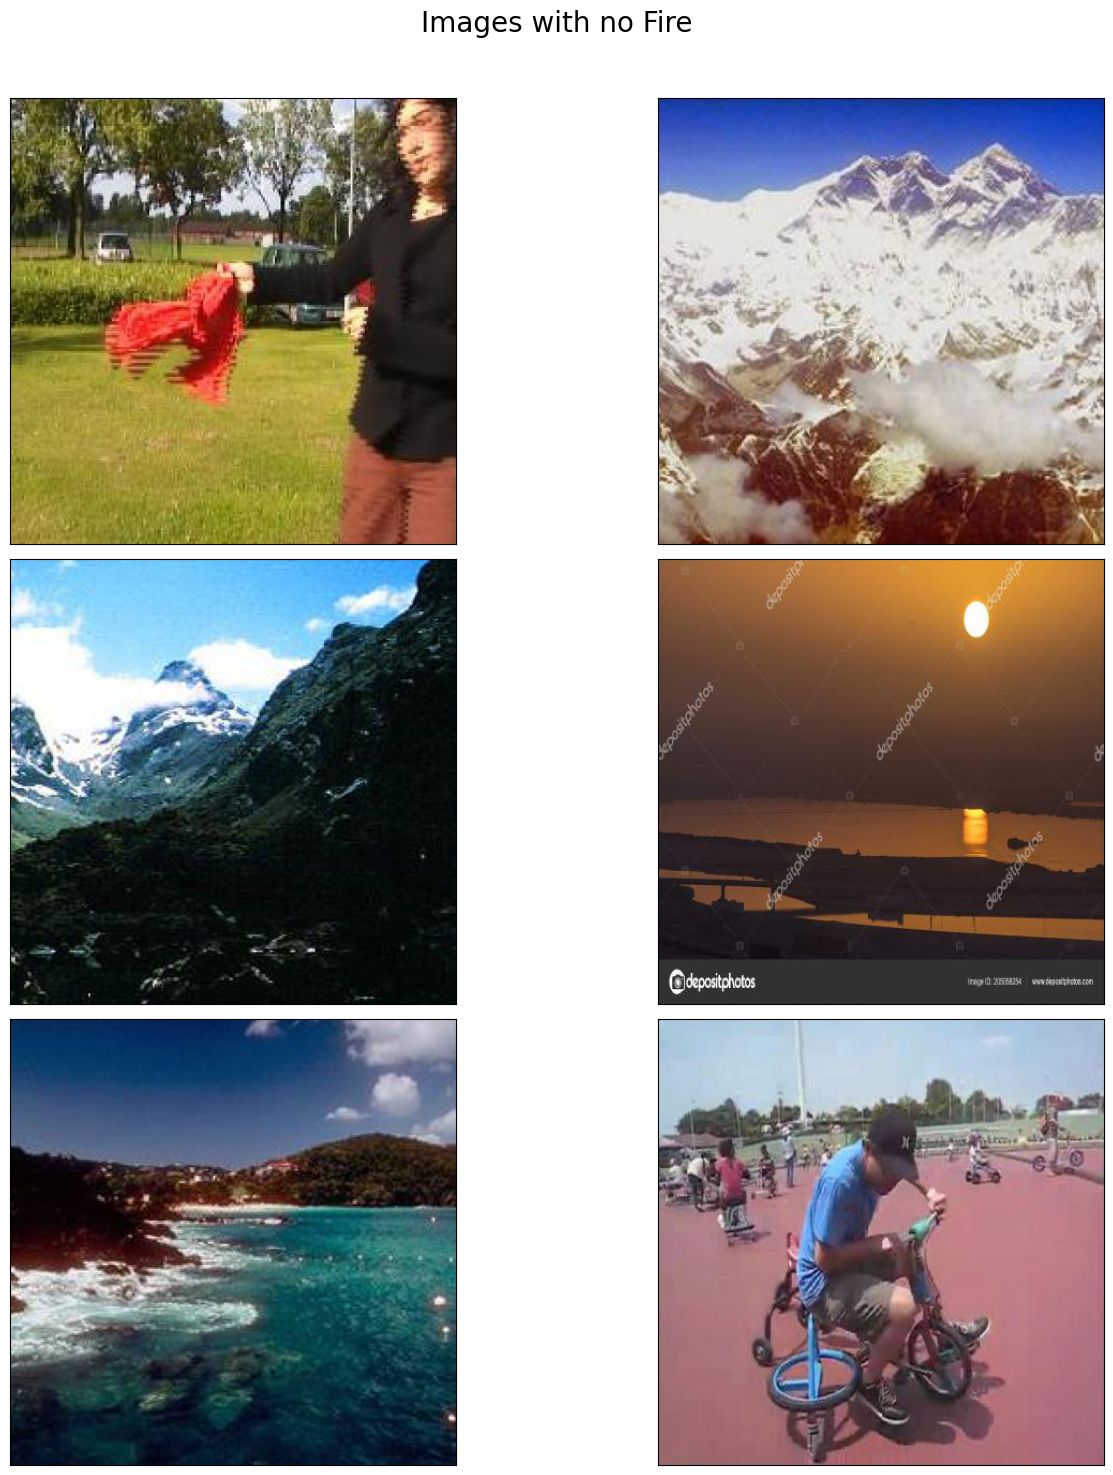

In [7]:
from tensorflow.keras.preprocessing import image


# Example data setup
# Assuming df is a pandas DataFrame with columns 'label' and 'path', where 'path' contains image paths.
label = 'nofire'  # Label for images with fire
data = df[df['label'] == label]

# Number of images to display
pics = 6

# Setting up the subplot grid
fig, ax = plt.subplots(int(pics // 2), 2, figsize=(15, 15))
plt.suptitle('Images with no Fire', fontsize=20)

# Flatten axes for easier iteration
ax = ax.ravel()

# Displaying images in the subplots
for i in range((pics // 2) * 2):
    # Sample a path from the dataset
    path = data.sample(1).loc[:, 'path'].to_numpy()[0]
    
    # Load and process the image
    img = image.load_img(path)
    img = image.img_to_array(img) / 255

    # Display the image
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Data Augmentation
To increase the diversity of our training data and simulate different conditions, we use ImageDataGenerator to apply transformations such as rescaling.

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named 'df' and has columns 'path' and 'label'
train_df, val_df = train_test_split(df, test_size=0.3, stratify=df['label'], random_state=42)

# Define your ImageDataGenerator with rescaling and validation split
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create a generator for training data
training_generator = image_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='path',
    y_col='label',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

# Create a generator for validation data
validation_generator = image_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='path',
    y_col='label',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    subset='validation'
)


Found 5344 validated image filenames belonging to 3 classes.
Found 572 validated image filenames belonging to 3 classes.


## Model Architecture
For the fire detection task, we use a convolutional neural network (CNN) which is well-suited for image processing.

### Defining the CNN
The model consists of convolutional layers, max pooling layers, and dense layers, structured to classify images into three categories: no fire, small fire, and large fire.

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()
# Add convolutional layer. Learn 16 filters using a 3x3 kernel
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(rate=0.15))

# Add convolutional layer. Learn 32 filters using a 3x3 kernel
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(rate=0.1))

# Flatten to a 1d array for feeding into our dense layer
model.add(Flatten())

# Add a dense layer with 128 neurons
model.add(Dense(128, activation='relu'))
#model.add(Dropout(rate=0.1))

# Add the final prediction later with 10 neurons, one for each class
model.add(Dense(3, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

### Compile and Train the Model
Compile the model with categorical crossentropy as the loss function and accuracy as the metric. We use early stopping to halt training when the validation loss ceases to decrease, preventing overfitting.

In [11]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [12]:
from tensorflow.keras import backend as K

def precision(y_true, y_pred):
    """Compute the precision of predictions."""
    true_positives = K.sum(K.round(K.clip(y_pred * y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision_value = true_positives / (predicted_positives + K.epsilon())
    return precision_value

def recall(y_true, y_pred):
    """Compute the recall of predictions."""
    true_positives = K.sum(K.round(K.clip(y_pred * y_true, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall_value = true_positives / (possible_positives + K.epsilon())
    return recall_value


In [13]:
# Compile the model with custom metrics
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', precision, recall]
)

In [14]:
# Training the model
history = model.fit(training_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10
167/167 [==============================] - 36s 209ms/step - loss: 0.9440 - accuracy: 0.5754 - precision: 0.6253 - recall: 0.4175 - val_loss: 0.8762 - val_accuracy: 0.5909 - val_precision: 0.5910 - val_recall: 0.5501
Epoch 2/10
167/167 [==============================] - 35s 208ms/step - loss: 0.7182 - accuracy: 0.6740 - precision: 0.7045 - recall: 0.6083 - val_loss: 0.7696 - val_accuracy: 0.6416 - val_precision: 0.6535 - val_recall: 0.6034
Epoch 3/10
167/167 [==============================] - 35s 209ms/step - loss: 0.5847 - accuracy: 0.7446 - precision: 0.7689 - recall: 0.7122 - val_loss: 0.7312 - val_accuracy: 0.6538 - val_precision: 0.6903 - val_recall: 0.6066
Epoch 4/10
167/167 [==============================] - 35s 210ms/step - loss: 0.4204 - accuracy: 0.8267 - precision: 0.8443 - recall: 0.8074 - val_loss: 0.8575 - val_accuracy: 0.6626 - val_precision: 0.6783 - val_recall: 0.6396
Epoch 5/10
167/167 [==============================] - 35s 212ms/step - loss: 0.2855 - accura

### Model Evaluation
Finally, we evaluate the trained model on the validation set to assess its performance.

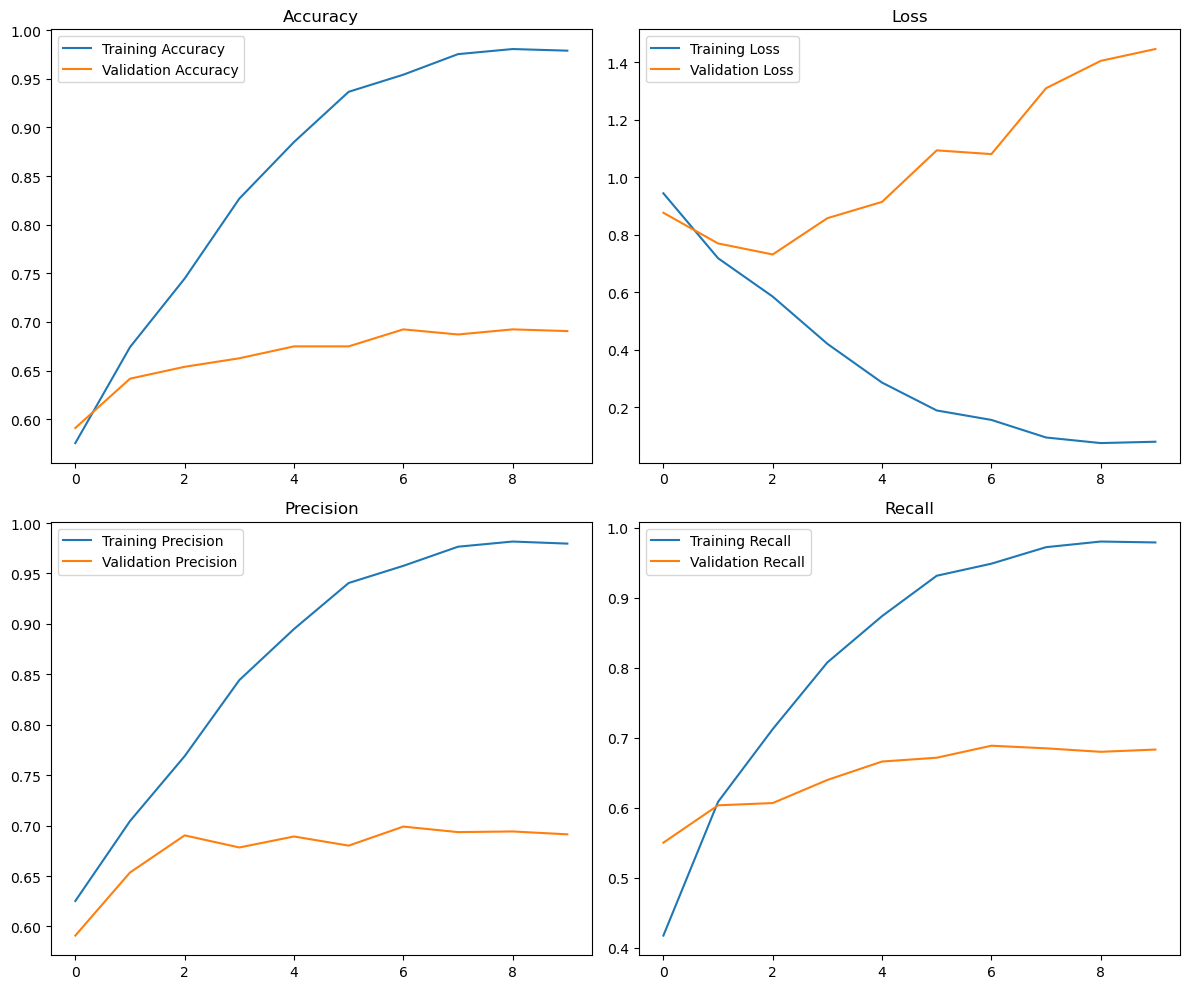

In [15]:
import matplotlib.pyplot as plt

# Assuming 'history' is the training history object returned from model.fit()

def plot_training_metrics(history):
    """Plot accuracy, loss, precision, and recall over training epochs."""
    # Create subplots for different metrics
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Accuracy graph
    axes[0, 0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[0, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[0, 0].set_title('Accuracy')
    axes[0, 0].legend()

    # Loss graph
    axes[0, 1].plot(history.history['loss'], label='Training Loss')
    axes[0, 1].plot(history.history['val_loss'], label='Validation Loss')
    axes[0, 1].set_title('Loss')
    axes[0, 1].legend()

    # Precision graph
    axes[1, 0].plot(history.history['precision'], label='Training Precision')
    axes[1, 0].plot(history.history['val_precision'], label='Validation Precision')
    axes[1, 0].set_title('Precision')
    axes[1, 0].legend()

    # Recall graph
    axes[1, 1].plot(history.history['recall'], label='Training Recall')
    axes[1, 1].plot(history.history['val_recall'], label='Validation Recall')
    axes[1, 1].set_title('Recall')
    axes[1, 1].legend()

    # Set layout and display plots
    plt.tight_layout()
    plt.show()

# Call the function with the model's history object
plot_training_metrics(history)

## Demonstration of Model Predictions on New Images_Nofire
In this section, we demonstrate how our trained convolutional neural network (CNN) model is used to predict the classification of a new image. We will load an image, preprocess it, feed it to the model, and interpret the output to understand the model's prediction.


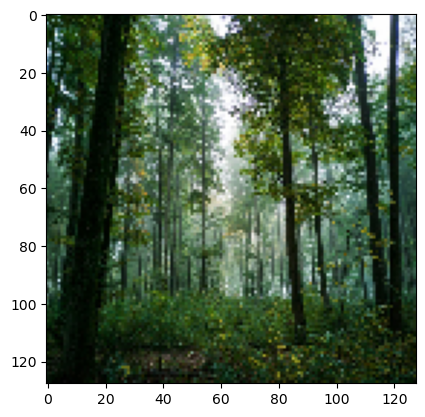

In [15]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

img = load_img(
    "C:/Users/ravik/Downloads/placeholder.jpeg",
    color_mode='rgb',
    target_size=(128,128)
)

plt.imshow(img)

In [16]:
#Convert the image to array
single_image = img_to_array(img)

#divide the image values by 255 to normalize
img_rank4 = np.expand_dims(single_image/255, axis=0)

#generate preduction using our model
model.predict(img_rank4)

1/1 [==============================] - 0s 83ms/step


array([[3.3595669e-13, 1.0000000e+00, 2.6563696e-09]], dtype=float32)

In [17]:
#since the output above is difficult to read, let's round
np.round(model.predict(img_rank4),2)

1/1 [==============================] - 0s 18ms/step


array([[0., 1., 0.]], dtype=float32)

In [18]:
# Now, we need to find the index where the prediction array is 1
np.argmax(model.predict(img_rank4), axis=-1)

1/1 [==============================] - 0s 19ms/step


array([1], dtype=int64)

In [19]:
# To get the label, we need to get the class indices from the training generator
label_map = (training_generator.class_indices)
label_map

{'large': 0, 'nofire': 1, 'small': 2}

In [20]:
# Now, we can use our prediction and get the class label from the class indices:
list(label_map.keys())[np.argmax(model.predict(img_rank4), axis=-1)[0]]

1/1 [==============================] - 0s 27ms/step


'nofire'

### Large_Fire Image Prediction

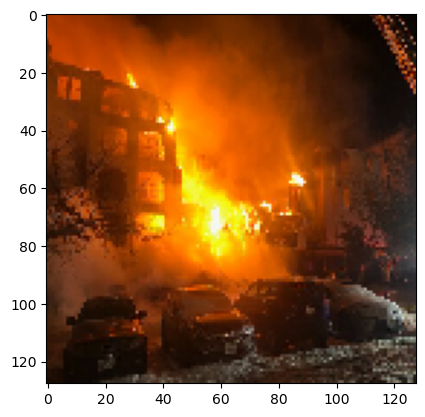

In [21]:
img = load_img(
    "C:/Users/ravik/Downloads/texas.png",
    color_mode='rgb',
    target_size=(128,128)
)

plt.imshow(img)

In [22]:
#Convert the image to array
single_image = img_to_array(img)

#divide the image values by 255 to normalize
img_rank4 = np.expand_dims(single_image/255, axis=0)

#generate preduction using our model
model.predict(img_rank4)

1/1 [==============================] - 0s 17ms/step


array([[8.5295296e-01, 1.1565653e-07, 1.4704691e-01]], dtype=float32)

In [23]:
#since the output above is difficult to read, let's round
np.round(model.predict(img_rank4),2)

1/1 [==============================] - 0s 17ms/step


array([[0.85, 0.  , 0.15]], dtype=float32)

In [24]:
# Now, we need to find the index where the prediction array is 1
np.argmax(model.predict(img_rank4), axis=-1)

1/1 [==============================] - 0s 17ms/step


array([0], dtype=int64)

In [25]:
# To get the label, we need to get the class indices from the training generator
label_map = (training_generator.class_indices)
label_map

{'large': 0, 'nofire': 1, 'small': 2}

In [26]:
# Now, we can use our prediction and get the class label from the class indices:
list(label_map.keys())[np.argmax(model.predict(img_rank4), axis=-1)[0]]

1/1 [==============================] - 0s 19ms/step


'large'

### Small_Fire Image Prediction

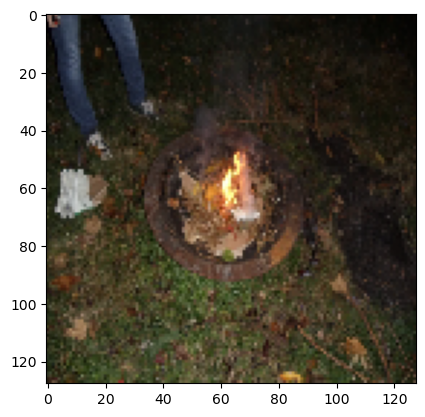

In [27]:
img = load_img(
    "C:/Users/ravik/Downloads/FOFJHT9I2Q1H5MB.png",
    color_mode='rgb',
    target_size=(128,128)
)

plt.imshow(img)

In [28]:
#Convert the image to array
single_image = img_to_array(img)

#divide the image values by 255 to normalize
img_rank4 = np.expand_dims(single_image/255, axis=0)

#generate preduction using our model
model.predict(img_rank4)

1/1 [==============================] - 0s 17ms/step


array([[0.05545792, 0.03080596, 0.9137361 ]], dtype=float32)

In [29]:
#since the output above is difficult to read, let's round
np.round(model.predict(img_rank4),2)

1/1 [==============================] - 0s 29ms/step


array([[0.06, 0.03, 0.91]], dtype=float32)

In [30]:
# Now, we need to find the index where the prediction array is 1
np.argmax(model.predict(img_rank4), axis=-1)

1/1 [==============================] - 0s 19ms/step


array([2], dtype=int64)

In [31]:
# To get the label, we need to get the class indices from the training generator
label_map = (training_generator.class_indices)
label_map

{'large': 0, 'nofire': 1, 'small': 2}

In [32]:
# Now, we can use our prediction and get the class label from the class indices:
list(label_map.keys())[np.argmax(model.predict(img_rank4), axis=-1)[0]]

1/1 [==============================] - 0s 17ms/step


'small'

### Summary

Here in this final project, we undertook the development of a CNN-based fire detection solution for wildland and urban settings. Here, we explain in detail the findings we got, challenges faced, and how we tried to understand working of our model and how its performance could be improved with the application of some visualization techniques.

Detailed Results Analysis:

### 1. Training Outfalls:
##### Accuracy: 
The model's accuracy during training was pretty nice, with it even reaching 97.2% in the final epoch, while along other epochs, it steadily reached even higher scores. The accuracy was pretty fine, suggesting that the model learned and adapted pretty well from the training data.

##### Precision and Recall: 
We achieve the highest precision and recall rate of 97.96% and 97.87% for all systems, respectively. These are, therefore, key metrics in any fire detection system, with costs associated with false positives (unnecessary alerts) and false negatives (missed fires) being very high.

### 2. Validation Outcomes:

##### Accuracy and Loss: 
Despite the coolness of the training accuracy, the validation accuracy was still pinned at 69.23%. For the loss, at first, the validation loss would keep decreasing, but then after the 4th epoch, it would start increasing, quite evidently showing that overfitting was setting in the model.

##### Generalization Concerns: 
The difference in the obtained scores between training and validation data usually indicates that while our model was very well greatly tuned for the training data, it does not generalize to never-before-seen data. This is, in general, a generalization problem in machine learning models, known as overfitting.

### 3. Predictive Performance on New Images:
Its practical effectiveness was tested by classifying new images into categories like "nofire", "small fire", and "large fire". It did well on new image classification, which also helps to show its promise in real-world applications.


## Enhanced Visualization Insights:

#### Dataset Distribution Visualization
This proved to be very important as it shed some light on the balanced nature of our dataset and how it was distributed into the different classes, thus really helping make sure the dataset was well conditioned for the training.

##### Performance Metrics Visualization:
The plots of accuracy, loss, precision, and recall versus the training epochs are shown in the following subsection. Such visual representations helped in tracking model improvement and the point from where the model starts overfitting, hence helped in deciding over early stopping.

Our CNN model presents great promise in automatically detecting fires with high accuracy within a controlled training environment. At the same time, the issues of generalization indicated by the validation performance suggest a further model refinement. 

Further efforts will be:
##### Supporting Data Diversity
It can be done by way of the inclusion of more varied data samples or simply putting better efforts into data augmentation to better the potential of the model to generalize in varied, pragmatic life scenarios.
##### Model Architecture and Regularization: 
We are going to consider making changes in the model's architecture and bring in more use of regularization techniques that help our model generalize better without overfitting.
##### Deployment and Real-World Testing: 
At this point, the present model has to be tested in real-world conditions for iterative improvement of its accuracy and reliability; it has to be made sure that it can actually help in detecting fire in different environments. 

Finally, We believe that the project of our interest would be able to construct a robust, reliable fire detection system that will significantly improve the level of safety and response time for fire-prone areas.